In [2]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda date: ast.literal_eval(date) if pd.notna(date) else date)

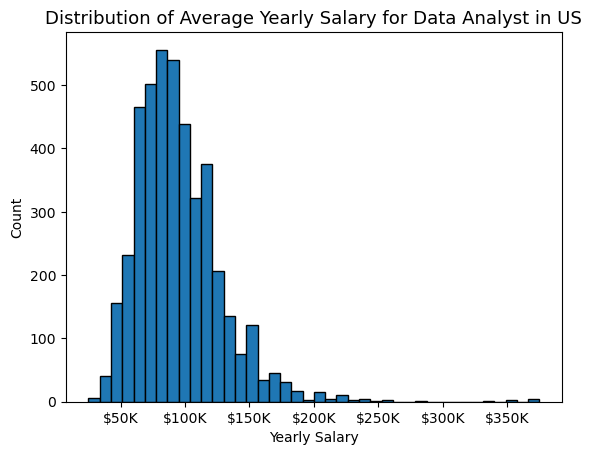

In [20]:
df_da_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_da_us['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')

plt.title('Distribution of Average Yearly Salary for Data Analyst in US', fontsize=13)
plt.xlabel('Yearly Salary')
plt.ylabel('Count')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.show()

## Practice Problems

### Data Scientist Hourly Salaries
Create a histogram to show the distribution of hourly salaries (use salary_hour_avg column) for Data Scientist job postings:

Create a new DataFrame called df_DS to filter out 'Data Scientist' jobs.
Customize the plot by setting the number of bins to 40 and the bar color to blue.
Label the x-axis as 'Hourly Salary' and the y-axis as 'Number of Jobs'.

In [10]:
df_ds = df[df['job_title_short'] == 'Data Scientist'].copy()

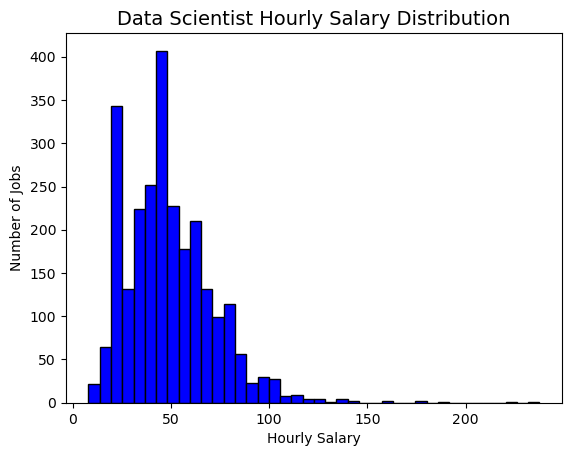

In [11]:
df_ds['salary_hour_avg'].plot(kind='hist', bins=40, color='blue', edgecolor='black')
#plt.xlim(0, 200)

plt.title('Data Scientist Hourly Salary Distribution', fontsize=14)
plt.xlabel('Hourly Salary')
plt.ylabel('Number of Jobs')
plt.show()

### Job Postings by Number of Skills
Create a histogram to show the distribution of job postings by the number of skills listed using the job_skills column:

- Create a new DataFrame called df_skills to filter out job postings with non-null job_skills.
- Customize the plot by setting the number of bins to 55, the bar color to 'magenta'
- Add a title 'Distribution of Job Postings by Number of Skills Listed'.
- Label the x-axis as 'Number of Skills' and the y-axis as 'Number of Job Postings'.

In [12]:
df_skills = df[df['job_skills'].notna()].copy()
df_skills['skill_counts'] = df_skills['job_skills'].apply(len)

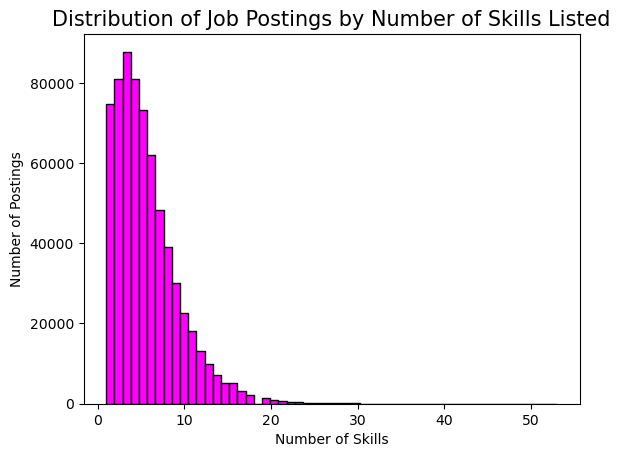

In [13]:
df_skills['skill_counts'].plot(kind='hist', bins=55, color='magenta', edgecolor='black')
plt.title('Distribution of Job Postings by Number of Skills Listed', fontsize=15)
plt.xlabel('Number of Skills')
plt.ylabel('Number of Postings')
plt.show()

### Data Engineer Salaries
Create a histogram to show the distribution of average yearly salaries (salary_year_avg) for Data Engineer job postings:

- Create a new DataFrame called df_DE to filter out 'Data Engineer' jobs.
- Customize the plot by setting the number of bins to 50, the bar color to red
- Add annotations for the mean and median salaries, using plt.axvline(); for the parameters specify:
 1. color: 'blue'/'green'
 2. linestyle: 'dashed'
 3. label: e.g., f'Mean: ${mean_salary:,.0f}'
- Label the x-axis as 'Yearly Salary' and the y-axis as 'Number of Jobs'.

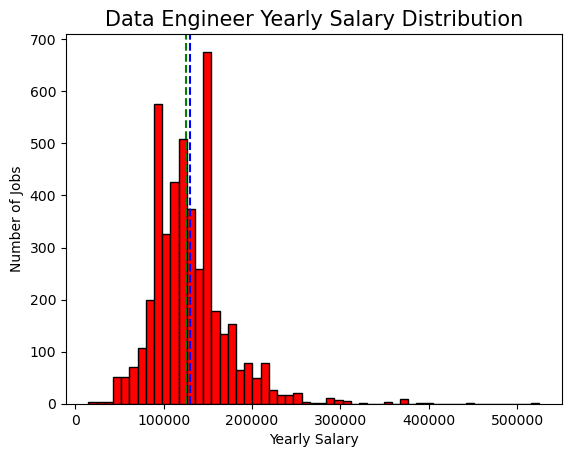

In [98]:
df_de = df[df['job_title_short'] == 'Data Engineer'].copy()

mean_salary = df_de['salary_year_avg'].mean()
median_salary = df_de['salary_year_avg'].median()

df_de['salary_year_avg'].plot(kind='hist', bins=55, color='red', edgecolor='black')
plt.axvline(mean_salary, color='blue', linestyle='dashed', label=f'Mean: ${mean_salary:,.0f}')
plt.axvline(median_salary, color='green', linestyle='dashed', label=f'Median: ${median_salary:,.0f}' )
plt.title('Data Engineer Yearly Salary Distribution', fontsize=15)
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.show()